In [2]:

from tqdm import tqdm
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import time

In [3]:
TEST_DATA_PATH = 'C:\\Users\\benza-ord\\source\\repos\\cifar-10-batches-py\\'


start = time.time()


In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


data = unpickle(TEST_DATA_PATH+'test_batch')


In [13]:
data[b"data"][0]

array([158, 159, 165, ..., 124, 129, 110], dtype=uint8)

In [14]:
img_height,img_width = 32,32 
num_classes = 10
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

C:\Users\benza-ord\anaconda3\envs\keras-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [38]:
import pandas as pd

imgs = pd.DataFrame() 
df_labels = pd.DataFrame() 

imgs = imgs.append(pd.DataFrame(data[b'data'])) 
df_labels = df_labels.append(pd.DataFrame(data[b'labels'])) 
imgs['labels'] = df_labels 

In [39]:
imgs.labels.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: labels, dtype: int64

In [41]:
imgs

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,158,159,165,166,160,156,162,159,158,159,...,123,145,167,182,175,145,124,129,110,3
1,235,231,232,232,232,232,232,232,232,232,...,117,123,133,141,153,163,178,191,199,8
2,158,158,139,132,166,182,187,193,199,205,...,46,44,44,43,52,37,8,3,7,8
3,155,167,176,190,177,166,168,166,170,179,...,55,70,103,105,72,53,50,52,50,0
4,65,70,48,30,23,40,44,45,45,40,...,127,156,139,131,130,147,136,146,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,185,177,223,239,239,235,236,234,236,8
9996,81,91,98,106,108,110,80,84,88,90,...,107,143,155,156,160,173,129,147,160,3
9997,20,19,15,15,14,13,12,11,10,9,...,112,68,50,52,52,51,50,53,47,5
9998,25,15,23,17,23,51,74,91,114,137,...,84,83,84,79,78,78,80,81,80,1


In [45]:
# generate first 100 minibatch from each class

for i in range(0,10):
    imgs.loc[imgs['labels'] == i][:100]

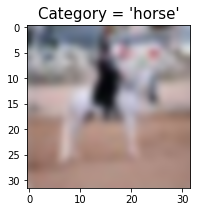

In [75]:
import matplotlib.pyplot as plt
import re

labels = unpickle(TEST_DATA_PATH+'batches.meta')[b'label_names']

def plot_CIFAR_image(ind): 
    img_row = np.asarray(imgs.iloc[:, :3072]) 
    arr = img_row[ind] 
    
    R = arr[0:1024].reshape(32,32)/255.0 
    G = arr[1024:2048].reshape(32,32)/255.0 
    B = arr[2048:].reshape(32,32)/255.0 
 
    img = np.dstack((R,G,B)) 
    title = re.sub('[!@#$b]', '', str(labels[df_labels.loc[ind][0]])) 
    fig = plt.figure(figsize=(3,3)) 
    ax = fig.add_subplot(111) 
    ax.imshow(img,interpolation='bicubic') 
    ax.set_title('Category = '+ title,fontsize =15) 
 
plot_CIFAR_image(3566) 

In [56]:
df_labels.iloc[3]

0    0
Name: 3, dtype: int64

In [72]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [76]:
model_cut = Model(inputs=base_model.inputs, output=base_model.layers[2].output)
model_cut.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 38, 38, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 64)        9472      
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________


C:\Users\benza-ord\anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


In [ ]:
features = model_cut.predict(x)  # Assuming you have your images in x

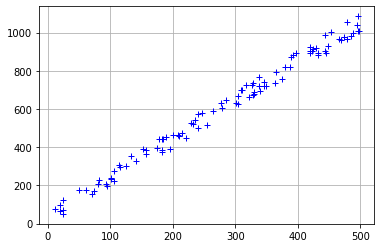

In [80]:
x_data = tf.multiply(5, tf.random.uniform([100], minval=0, maxval=100, dtype = tf.float32, seed = 0))
y_data = tf.multiply(2, x_data) + 1 + tf.random.uniform([100], minval=0, maxval=100, dtype = tf.float32, seed = 0)
X = tf.stack([x_data, y_data], axis=1)
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.plot(X[:,0], X[:,1], '+', color='b')
plt.grid()

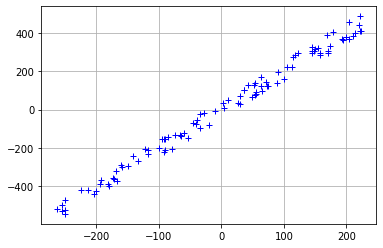

In [82]:
def normalize(data):
 # creates a copy of data
 X = tf.identity(data)
 # calculates the mean
 X -=tf.reduce_mean(data, axis=0)
 return X

normalized_data = normalize(X)
plt.plot(normalized_data[:,0], normalized_data[:,1], '+', color='b')
plt.grid()

In [86]:
# Finding the Eigne Values and Vectors for the data
eigen_values, eigen_vectors = tf.linalg.eigh(tf.tensordot(tf.transpose(normalized_data), normalized_data, axes=1))
print('Eigen Vectors: \n{} \nEigen Values: \n{}'.format(eigen_vectors, eigen_values))

Eigen Vectors: 
[[-0.89603883  0.44397572]
 [ 0.44397572  0.89603883]] 
Eigen Values: 
[   16620.5 10222314. ]


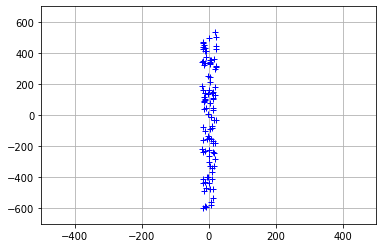

In [87]:
X_new = tf.tensordot(tf.transpose(eigen_vectors), tf.transpose(normalized_data), axes=1)
plt.plot(X_new[0, :], X_new[1, :], '+', color='b')
plt.xlim(-500, 500)
plt.ylim(-700, 700)
plt.grid()